In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#reading the dataset
df = pd.read_csv('../Data/appData_Analysis.csv')
df

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


In [3]:
#check NaN values
df.isna().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

# EDA

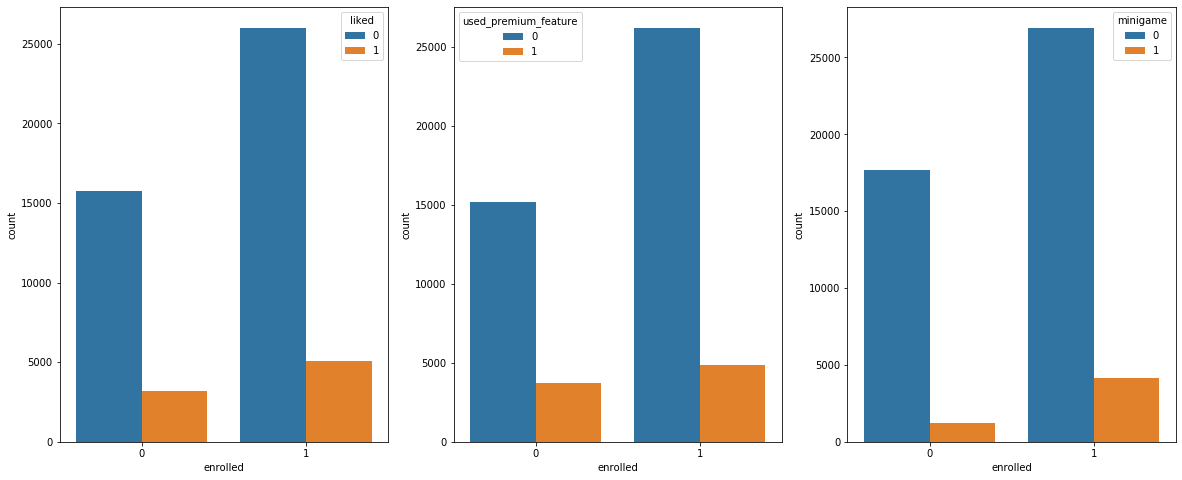

In [4]:
#EDA on categorical Data wih countplots
fig, ax =plt.subplots(1, 3, figsize=(20, 8))
sns.countplot(x = 'enrolled', hue = 'liked', data = df, ax = ax[0])
sns.countplot(x = 'enrolled', hue = 'used_premium_feature', data = df, ax = ax[1])
sns.countplot(x = 'enrolled', hue = 'minigame', data = df, ax = ax[2])

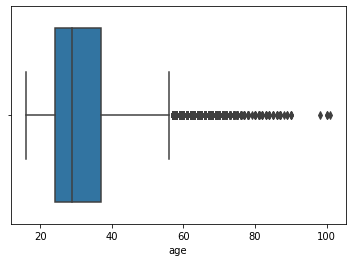

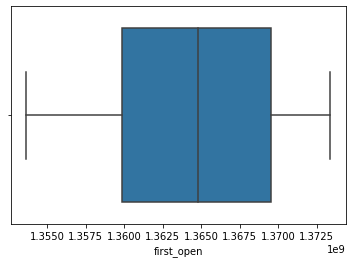

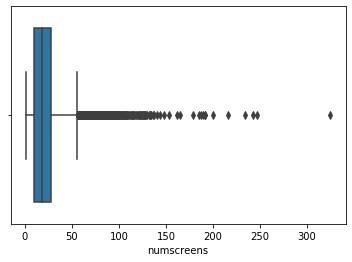

In [5]:
#Boxplots for continuous variables
tmp_first_open = df['first_open'].apply(lambda x : pd.Timestamp(x).timestamp())
tmp_first_open = tmp_first_open.to_frame()
age_plot = sns.boxplot(x = df['age'])
plt.figure()
first_open_plot = sns.boxplot(x = tmp_first_open['first_open'])
plt.figure()
numscreens_plot = sns.boxplot(x = df['numscreens'])

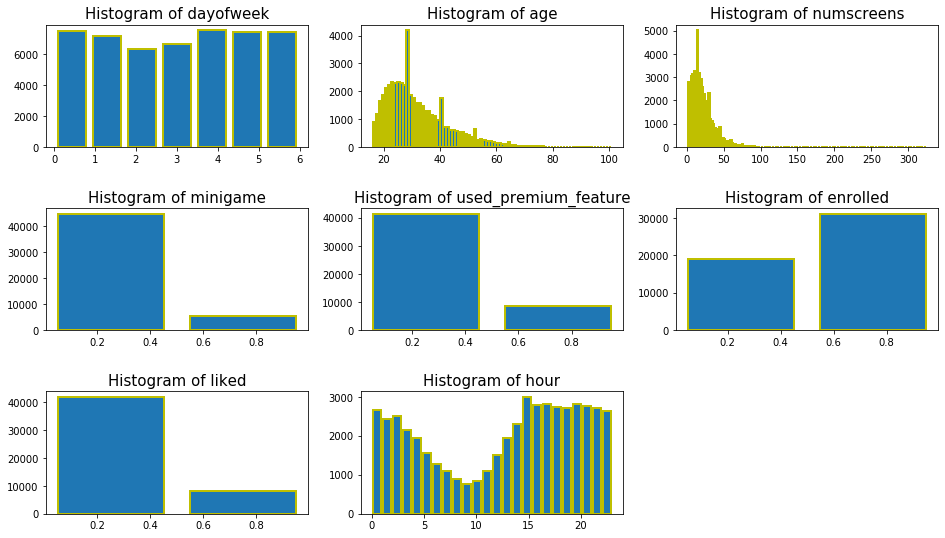

In [6]:
plt.figure(figsize = (16,9)) # figure size in ratio 16:9
df_dropped = df.drop(['user', 'first_open', 'screen_list', 'enrolled_date', 'hour'], axis = 1)
df_trunc = pd.concat([df_dropped, df['hour'].apply(lambda x: int(x[:3]))], axis = 1)
feature_names = df_trunc.columns # list of columns name
for i,j in enumerate(feature_names): 
    plt.subplot(3,3,i+1) # subplot for histogram
    plt.title("Histogram of {}".format(j), fontsize = 15) # title of histogram
    
    bins = len(df_trunc[j].unique()) # bins for histogram
    plt.hist(df_trunc[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) # plot histogram
    
plt.subplots_adjust(hspace=0.5) # space between horixontal axes (subplots)

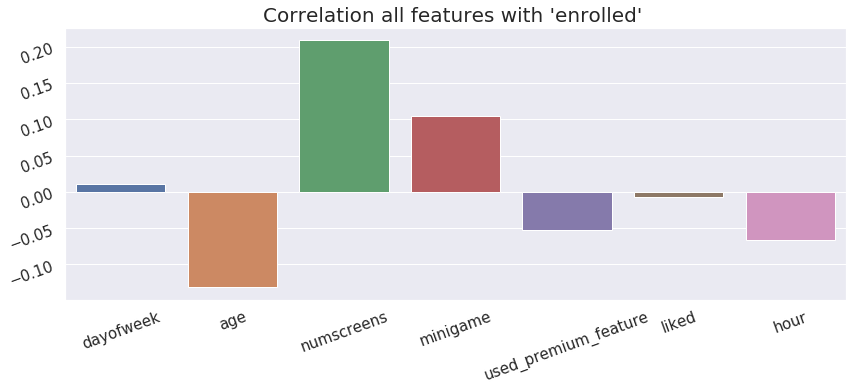

In [7]:
sns.set() # set background dark grid
plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize = 20)
df_temp = df_trunc.drop(['enrolled'], axis = 1) # drop 'enrolled' feature
ax =sns.barplot(df_temp.columns,df_temp.corrwith(df_trunc.enrolled)) # plot barplot 
ax.tick_params(labelsize=15, labelrotation = 20, color ="k") 

Text(0.5, 1, 'Heatmap using correlation matrix')

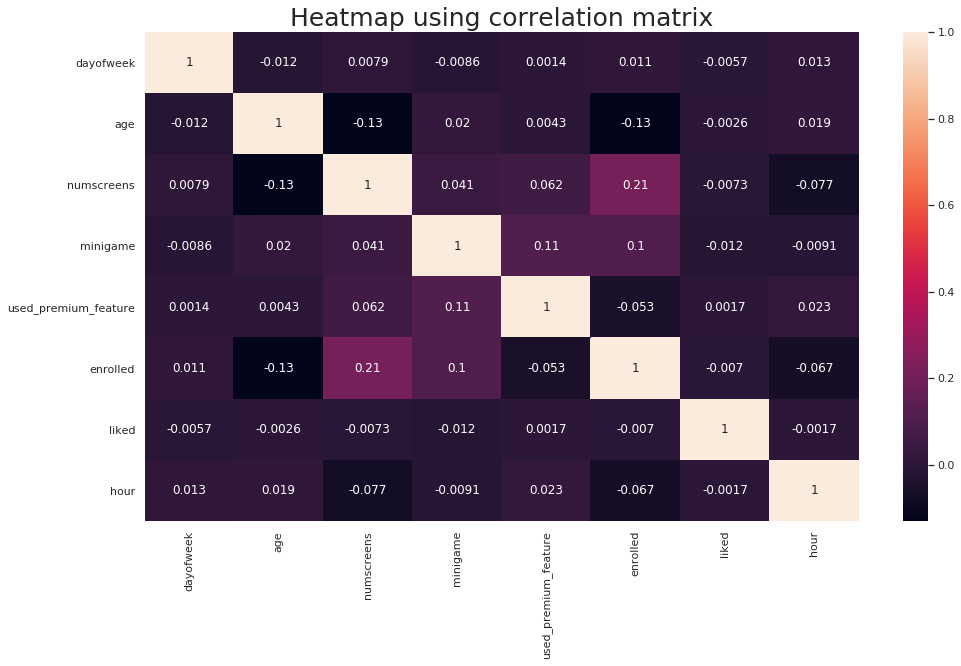

In [8]:
# Heatmap
plt.figure(figsize=(16,9)) # heatmap size in ratio 16:9

ax = sns.heatmap(df_trunc.corr(), annot = True) # show heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Heatmap using correlation matrix", fontsize = 25) # title of heatmap 

# TRAIN VALIDATE TEST SPLIT

In [9]:
from sklearn.model_selection import train_test_split

#Splitting labels and features from the data
labels = df['enrolled']
features = df.drop(['enrolled_date','enrolled'], axis = 1)

#construct vocabulary of screens
screen_vocab = set([x for x in (','.join(df['screen_list'])).split(',')])
screen_index = {s:i for i,s in enumerate(screen_vocab)}
vocab_size = len(screen_vocab)

#Map the screen list feature to a vector of screen indices
df_screen_indices = list(df['screen_list'].apply(lambda x : [screen_index[w] for w in x.split(',')]))

#Split Data into Train, Test and Validation Data
X_tot, X_Test, Y_tot, Y_Test = train_test_split(features, labels, test_size=0.1, random_state=20)
X_Train, X_validate, Y_Train, Y_validate = train_test_split(X_tot, Y_tot, test_size=0.11, random_state=20)

#train = 40000, validate = 5000, test = 5000
print('Shape of X_Train: ', X_Train.shape)
print('Shape of X_validate: ', X_validate.shape)
print('Shape of X_Test: ', X_Test.shape)
print('Vocab_Size: ',  vocab_size)

Shape of X_Train:  (40050, 10)
Shape of X_validate:  (4950, 10)
Shape of X_Test:  (5000, 10)
Vocab_Size:  137


In [10]:
#HyperParameters
pca_dim = 40
imp_fac = 10

# DATA PRE_PROCESSING

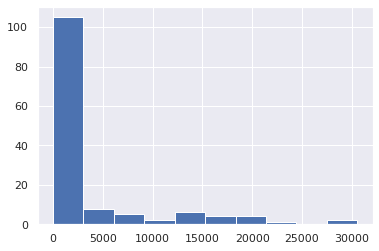

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Initialize the pre-processing units
pca = PCA(n_components=pca_dim)
scaler = StandardScaler()

#initialize word vectors and calculate idf weights for the screens
word_vectors = np.identity(vocab_size)
idf = np.zeros(vocab_size)
for i in range(X_Train.shape[0]):
    idf[list(set(df_screen_indices[i]))] += 1
idf_arr = imp_fac*np.log((1.0 + X_Train.shape[0]*np.ones(vocab_size))/(1.0 + idf))

#Show the distribution of words in the Dataset
plt.hist(idf)
plt.show()

In [12]:
#Function to pre-process and scale the train, test and validation data

# X : Data to process
# label : part of data ['show_var', 'train', 'test', 'validate']
# flag : 0 or 1 whether to perform PCA or not

def pre_process_scale(X, label, flag):
    #Construct the list of screen indices from the list of strings of screens.
    #Initialize the sentence vector and compute them as the weighted sum of the corresponding word vectors
    #screen_df is the encoded screen list data in numeric form
    screen_indices = list(X['screen_list'].apply(lambda x : [screen_index[w] for w in x.split(',')]))
    sentence_vec = np.zeros((X.shape[0], vocab_size))
    for i in range(X.shape[0]):
        x = tuple(screen_indices[i])
        sentence_vec[i, : ]= np.sum(word_vectors[x, :]*(idf_arr[list(x)].reshape(len(x), 1)), axis = 0)
    screen_df = pd.DataFrame(sentence_vec, columns = ['V' + str(i) for i in range(vocab_size)], index = X.index)
    
    #Calculate the eigensum and check viability of PCA
    if(label == 'show_var'):   
        eigsum = []
        for k in range(10, 130, 10):
            tpca = PCA(n_components=k)
            princ_comp = tpca.fit_transform(screen_df)
            eigsum.append(np.sum(tpca.explained_variance_))
        plt.plot(range(10, 130, 10), eigsum)
        plt.title('PCA VIABILITY')
        plt.xlabel('dimension')
        plt.ylabel('captured variance')
        plt.show()
        return
    # Transform Data to a lower dimension if PCA is viable
    if (label == 'train'):
        princ_comp = pd.DataFrame(pca.fit_transform(screen_df), columns = ['V' + str(i) for i in range(pca_dim)], index = X.index)
    else:
        princ_comp = pd.DataFrame(pca.transform(screen_df), columns = ['V' + str(i) for i in range(pca_dim)], index = X.index)
    
    #Convert the first_open field from datetime to timestamp format
    first_open = X['first_open'].apply(lambda x : pd.Timestamp(x).timestamp())
    first_open = first_open.to_frame()
    
    #Drop unnecessary columns
    XN = X.drop(labels = ['screen_list', 'user', 'first_open', 'hour'], axis = 1)
    
    #Concatenate the parts of processed data, scale it using a standard scaler and return the result
    if(flag):
        XFinal = pd.concat([first_open, princ_comp, XN], axis = 1)
        if(label == 'train'):
            return(pd.DataFrame(scaler.fit_transform(XFinal), columns = XFinal.columns, index = XFinal.index))
        else:
            return(pd.DataFrame(scaler.transform(XFinal), columns = XFinal.columns, index = XFinal.index))
    else:
        XFinal = pd.concat([first_open, screen_df, XN], axis = 1)
        if(label == 'train'):
            return(pd.DataFrame(scaler.fit_transform(XFinal), columns = XFinal.columns, index = XFinal.index))
        else:
            return(pd.DataFrame(scaler.transform(XFinal), columns = XFinal.columns, index = XFinal.index))

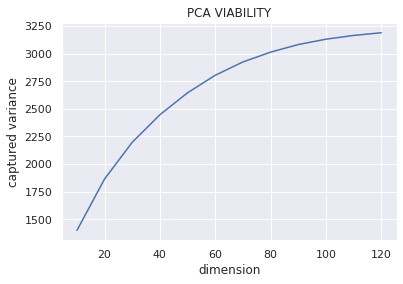

In [13]:
#Check variance distribution if PCA is done
# The resultant graph shows that PCA will result in loss as most of the variance is not
# captured by a lower dimension
pre_process_scale(X_Train, 'show_var', 1)

# MODEL FITTING AND TESTING 

In [14]:
#Tuned Parameters for each model
best_params = { 'RandomForest' : { 'n_trees' : 100, 'depth' : 19},
                'DecisionTree' : { 'depth' : 10},
                'Logistic_Regression' : {'C' : 0.5},
                'Xgboost' : {'steps' : 15, 'eta' : 0.3, 'max_depth' : 8}
              }

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# fit the model indicated by the model name and train the model on the training data
# and optionally tune it on the validation Data 

#Parameters:
# Train_D : Training Data
# Train_L : Training Labels
# Validation_D : Validation Data
# Validation_L : Validation Labels
# model_name : Name of ML model ['DecisionTree', 'RandomForest', 'Logistic_Regression', 'Xgboost']
# tune : 0 or 1 whether to tune or not
# params : parameters of the model to train without tuning

def fit_model(Train_D, Validation_D, Train_L, Validation_L, model_name, tune, params):
    validation_acc = []
    train_acc = []
    models = []
    if model_name == 'RandomForest':
        if tune:  # For Tuning
            for depth in range(10, 50, 9):
                model = RandomForestClassifier(n_estimators = n_trees, max_depth = depth)
                model.fit(Train_D, Train_L)
                Y_Test_pred = model.predict(Validation_D)
                Y_Train_pred = model.predict(Train_D)
                validation_acc.append(accuracy_score(Validation_L, Y_Test_pred))
                train_acc.append(accuracy_score(Train_L, Y_Train_pred))
                models.append(model)
            plt.plot(range(10, 50, 9), validation_acc)
            plt.plot(range(10, 50, 9), train_acc)
            plt.show()
            model = models[np.argmax(validation_acc)]
            return model
        else: # For given parameters
            model = RandomForestClassifier(n_estimators = params['n_trees'], max_depth = params['depth'])
            model.fit(Train_D, Train_L)
            return model
    
    elif model_name == 'DecisionTree':
        if tune :  # For Tuning
            for depth in range(1, 20, 2):
                model = DecisionTreeClassifier(max_depth = depth)
                model.fit(Train_D, Train_L)
                Y_Test_pred = model.predict(Validation_D)
                Y_Train_pred = model.predict(Train_D)
                validation_acc.append(accuracy_score(Validation_L, Y_Test_pred))
                train_acc.append(accuracy_score(Train_L, Y_Train_pred))
                models.append(model)
            plt.plot(range(1, 20, 2), validation_acc)
            plt.plot(range(1, 20, 2), train_acc)
            plt.show()
            model = models[np.argmax(validation_acc)]
            return model
        else: # For given parameters
            model = DecisionTreeClassifier(max_depth = params['depth'])
            model.fit(Train_D, Train_L)
            return model
    
    elif model_name == 'Logistic_Regression':
        if tune:  # For Tuning
            for cval in 0.1*np.arange(1, 10):
                model = LogisticRegression(penalty = 'l1', C =cval, solver='liblinear', multi_class='ovr')
                model.fit(Train_D, Train_L)
                Y_Test_pred = model.predict(Validation_D)
                Y_Train_pred = model.predict(Train_D)
                validation_acc.append(accuracy_score(Validation_L, Y_Test_pred))
                train_acc.append(accuracy_score(Train_L, Y_Train_pred))
                models.append(model)
            plt.plot(0.1*np.arange(1, 10), validation_acc)
            plt.plot(0.1*np.arange(1, 10), train_acc)
            plt.show()
            model = models[np.argmax(validation_acc)]
            return model
        else:   # For given parameters
            model = LogisticRegression(penalty = 'l1', C =params['C'], solver='liblinear', multi_class='ovr')
            model.fit(Train_D, Train_L)
            return model
        
    elif model_name == 'Xgboost':
        param = {
            'eta': params['eta'], 
            'max_depth': params['max_depth'],  
            'objective': 'multi:softprob',  
            'num_class': 2} 
        steps = params['steps']
        D_train = xgb.DMatrix(Train_D, label=Train_L)
        model = xgb.train(param, D_train, steps)
        return model

In [16]:
# Creating processed data and evaluating the performance of various models. 

res_dict = {} # stores the result of evaluation metrics on results of different models
proc_data = {} # stores processed data

for data, label in [(X_Train, 'train'), (X_validate, 'validate'), (X_Test, 'test')]:
    proc_data[label] = pre_process_scale(data, label, 0)
    
Train_Data = proc_data['train']
Validation_Data = proc_data['validate']
Test_Data = proc_data['test']

# Fit the models on the training data and store the value of evaluation metrics on the test data results
# using tuned parameters

for model_name in ['DecisionTree', 'RandomForest', 'Logistic_Regression', 'Xgboost']:
   
    # fetch tuned parameters and fit the model
    model_params = best_params[model_name] 
    model = fit_model(Train_Data, Validation_Data, Y_Train, Y_validate, model_name, 0, model_params)
    
    # Display Validation accuracy and store the goodness of fit values for the model
    if model_name == 'Xgboost':
        D_validate = xgb.DMatrix(Validation_Data, label=Y_validate)
        D_Test = xgb.DMatrix(Test_Data, label=Y_Test)
        Valid_pred = np.asarray([np.argmax(line) for line in model.predict(D_validate)])
        Test_pred = np.asarray([np.argmax(line) for line in model.predict(D_Test)])
        print(model_name + ": Validation_Acurracy = ", accuracy_score(Y_validate, Valid_pred))
        res_dict[model_name] = [accuracy_score(Y_Test, Test_pred), precision_score(Y_Test, Test_pred), 
                                recall_score(Y_Test, Test_pred), f1_score(Y_Test, Test_pred)]
    else:
        Valid_pred = model.predict(Validation_Data)
        Test_pred = model.predict(Test_Data)
        print(model_name + ": Validation_Acurracy = ", accuracy_score(Y_validate, Valid_pred))
        res_dict[model_name] = [accuracy_score(Y_Test, Test_pred), precision_score(Y_Test, Test_pred), 
                                recall_score(Y_Test, Test_pred), f1_score(Y_Test, Test_pred)]

DecisionTree: Validation_Acurracy =  0.851919191919192
RandomForest: Validation_Acurracy =  0.8577777777777778
Logistic_Regression: Validation_Acurracy =  0.8422222222222222
Xgboost: Validation_Acurracy =  0.8581818181818182


In [17]:
#Resultant goodness of fit measures
result_df = pd.DataFrame([[k] + v for k, v in res_dict.items()], columns = ['model', 'accuracy', 'precision', 'recall', 'f1score'])
result_df

,model,accuracy,precision,recall,f1score
0,DecisionTree,0.8530,0.918353,0.840089,0.877480
1,RandomForest,0.8686,0.943728,0.840409,0.889076
2,Logistic_Regression,0.8468,0.920725,0.826684,0.871174
3,Xgboost,0.8648,0.940165,0.837536,0.885888


# PARAMETER TUNING

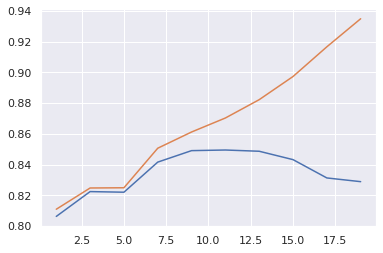

DecisionTree: Validation_Acurracy =  0.8494949494949495


NameError: name 'n_trees' is not defined

In [18]:
#Same as before but for tuning parameters
res_dict = {}
proc_data = {}
for data, label in [(X_Train, 'train'), (X_validate, 'validate'), (X_Test, 'test')]:
    proc_data[label] = pre_process_scale(data, label, 0)
Train_Data = proc_data['train']
Validation_Data = proc_data['validate']
Test_Data = proc_data['test']
Trunc_Train = Y_Train.loc[Train_Data.index]
for model_name in ['DecisionTree', 'RandomForest', 'Logistic_Regression', 'Xgboost']:
    model_params = best_params[model_name]
    model = fit_model(Train_Data, Validation_Data, Trunc_Train, Y_validate, model_name, 1, model_params)

    if model_name == 'Xgboost':
        D_validate = xgb.DMatrix(Validation_Data, label=Y_validate)
        D_Test = xgb.DMatrix(Test_Data, label=Y_Test)
        Valid_pred = np.asarray([np.argmax(line) for line in model.predict(D_validate)])
        Test_pred = np.asarray([np.argmax(line) for line in model.predict(D_Test)])
        print(model_name + ": Validation_Acurracy = ", accuracy_score(Y_validate, Valid_pred))
    else:
        Valid_pred = model.predict(Validation_Data)
        Test_pred = model.predict(Test_Data)
        print(model_name + ": Validation_Acurracy = ", accuracy_score(Y_validate, Valid_pred))